In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("scholarship.csv")

In [4]:
df = data.copy()

In [5]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [7]:
df.shape

(1000, 3)

/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_78090/406851068.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["semester_percentage"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_78090/406851068.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figu

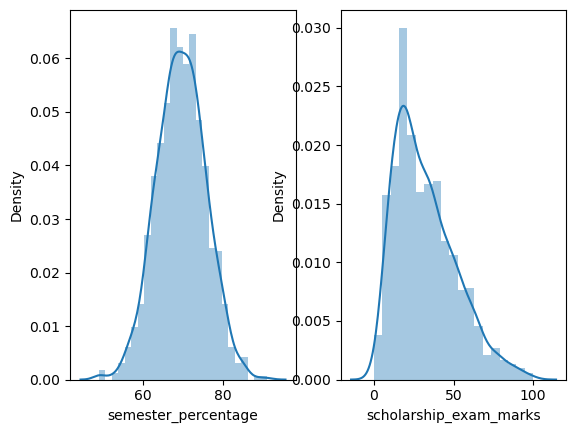

In [11]:
plt.subplot(1,2,1)
sns.distplot(df["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(df["scholarship_exam_marks"])
plt.show()

In [12]:
mean = df["semester_percentage"].mean()
std = df["semester_percentage"].std()

In [13]:
print(mean,",",std)

69.6124 , 6.158978751323897


## TRIMMING

In [14]:
Highest_allowed = mean + 3* std
Lowest_allowed = mean - 3* std

In [15]:
df[(df["semester_percentage"]< Lowest_allowed) | (df["semester_percentage"] > Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [16]:
df[(df["semester_percentage"]> Lowest_allowed) & (df["semester_percentage"] < Highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


## IQR

In [18]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_78090/828206924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

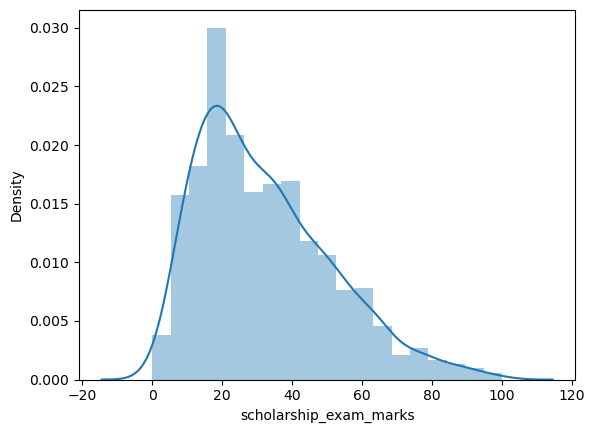

In [19]:
sns.distplot(data["scholarship_exam_marks"])

<Axes: >

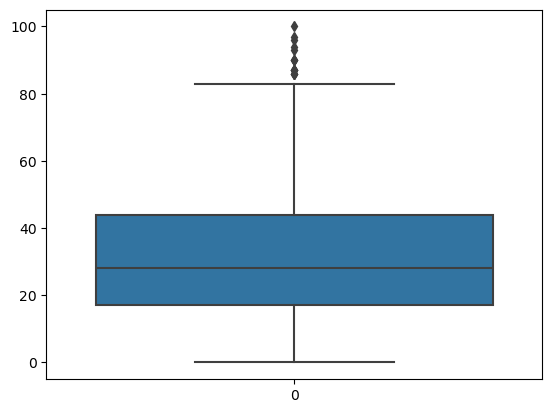

In [20]:
sns.boxplot(data["scholarship_exam_marks"])

In [26]:
Q1 = data["scholarship_exam_marks"].quantile(0.25)
Q3 = data["scholarship_exam_marks"].quantile(0.75)

In [27]:
Q1

17.0

In [28]:
Q3

44.0

In [30]:
IQR = Q3 - Q1
IQR

27.0

In [31]:
df.describe()

,semester_percentage,scholarship_exam_marks,got_scholarship
count,1000.000000,1000.000000,1000.000000
mean,69.612400,32.225000,0.489000
std,6.158979,19.130822,0.500129
min,48.900000,0.000000,0.000000
25%,65.500000,17.000000,0.000000
50%,69.600000,28.000000,0.000000
75%,73.700000,44.000000,1.000000
max,91.200000,100.000000,1.000000


In [34]:
min = Q1 - 1.5*IQR
max = Q3 + 1.5*IQR

In [35]:
min

-23.5

In [36]:
max

84.5

In [37]:
data[(data["scholarship_exam_marks"]<min) | (data["scholarship_exam_marks"]>max)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


### TRIMMING

In [38]:
new_data = data[(data["scholarship_exam_marks"]>min) & (data["scholarship_exam_marks"]<max)]

/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_78090/2265884458.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["scholarship_exam_marks"])
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/pd/cn2f6bwj5xldgl8r6p_2vr640000gn/T/ipykernel_78090/2265884458.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` 

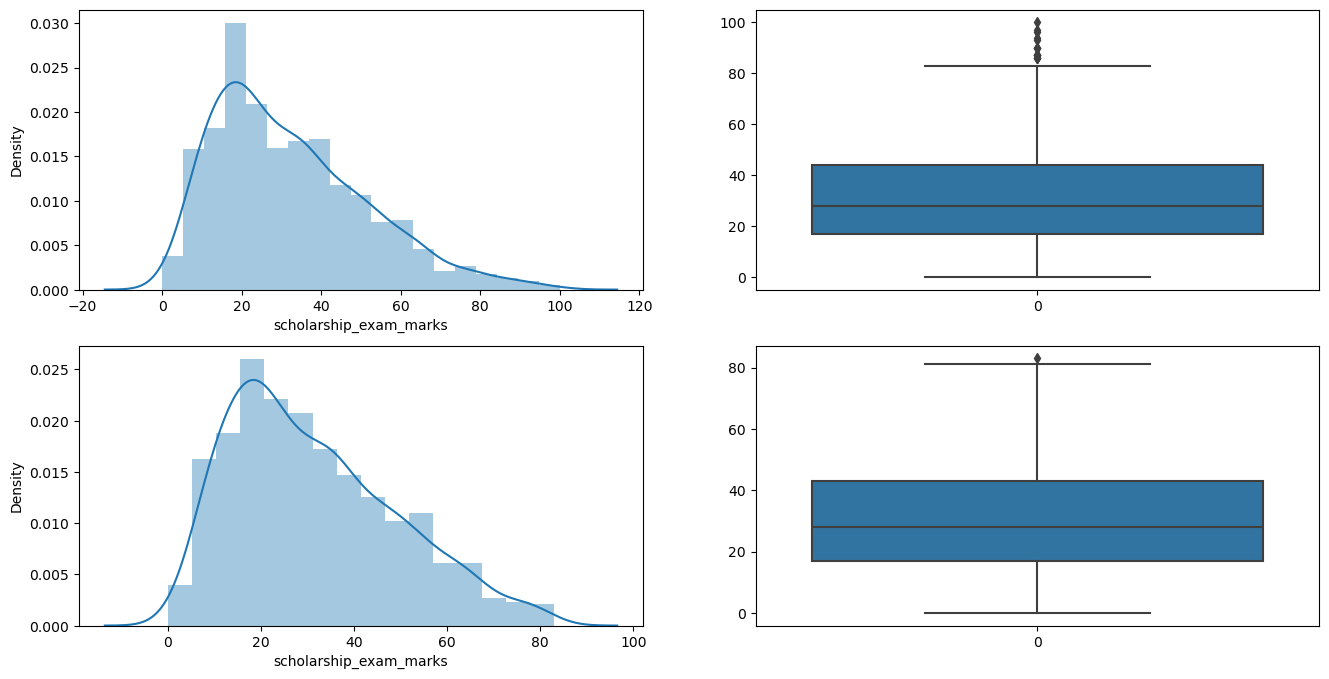

In [41]:
plt.figure(figsize = (16,8))
plt.subplot(2,2,1)
sns.distplot(data["scholarship_exam_marks"])

plt.subplot(2,2,2)
sns.boxplot(data["scholarship_exam_marks"])

plt.subplot(2,2,3)
sns.distplot(new_data["scholarship_exam_marks"])

plt.subplot(2,2,4)
sns.boxplot(new_data ["scholarship_exam_marks"])

plt.show()

## CAPPING

In [42]:
data["scholarship_exam_marks"] = np.where(data["scholarship_exam_marks"]>max,max,
                                          np.where(data["scholarship_exam_marks"]<min,min,data["scholarship_exam_marks"]))

In [44]:
data.shape

(1000, 3)

<Axes: >

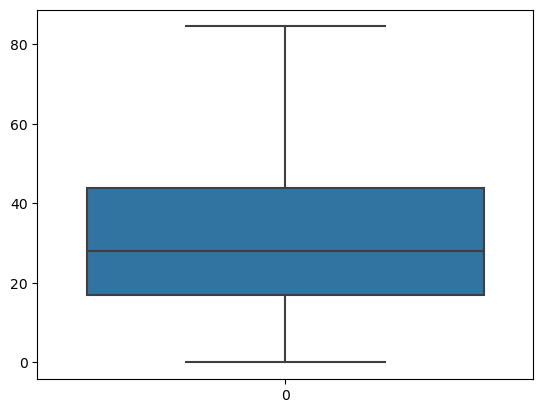

In [45]:
sns.boxplot(data["scholarship_exam_marks"])